In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import brokenaxes

In [538]:
folder_path = 'C:/research/india_outage/1214'
files = glob.glob(f'{folder_path}/byindustry*.xls')

In [539]:
name_index = list()
for file in files:
    name_index.append([int(file.split('_')[-1].split('.')[0]),file])
name_index.sort(key=lambda x: x[0])
name_index

[[1, 'C:/research/india_outage/1214\\byindustry_18105_1.xls'],
 [2, 'C:/research/india_outage/1214\\byindustry_15311_2.xls'],
 [3, 'C:/research/india_outage/1214\\byindustry_36101_3.xls'],
 [4, 'C:/research/india_outage/1214\\byindustry_28920_4.xls'],
 [5, 'C:/research/india_outage/1214\\byindustry_50200_5.xls'],
 [6, 'C:/research/india_outage/1214\\byindustry_52605_6.xls'],
 [7, 'C:/research/india_outage/1214\\byindustry_15312_7.xls'],
 [8, 'C:/research/india_outage/1214\\byindustry_28111_8.xls'],
 [9, 'C:/research/india_outage/1214\\byindustry_18101_9.xls'],
 [10, 'C:/research/india_outage/1214\\byindustry_52603_10.xls']]

In [540]:
df_summary = pd.DataFrame()

n_sheets = 8
sheets = pd.ExcelFile(name_index[0][1]).sheet_names

for sheet in sheets[0:n_sheets]:
    print(sheet)
    effect = list()
    lower_bound = list()
    upper_bound = list()
    for idx, file in name_index:
        if sheet == sheets[0]:
            print(idx, file)
        df = pd.read_excel(file, sheet_name=sheet, header=0, index_col=0)
        effect.append(df['b']['demeaned_shortage_percent'])
        lower_bound.append(df['ll']['demeaned_shortage_percent'])
        upper_bound.append(df['ul']['demeaned_shortage_percent'])
    df_summary = pd.concat([df_summary,pd.DataFrame({f'effect_{sheet}':effect, f'lower_bound_{sheet}':lower_bound, f'upper_bound_{sheet}':upper_bound})], axis=1)
    df_summary[f'error_{sheet}'] = (df_summary[f'upper_bound_{sheet}'] - df_summary[f'lower_bound_{sheet}'])/2
df_summary['category'] = pd.Categorical(df_summary.index+1)
df_summary


gva
1 C:/research/india_outage/1214\byindustry_18105_1.xls
2 C:/research/india_outage/1214\byindustry_15311_2.xls
3 C:/research/india_outage/1214\byindustry_36101_3.xls
4 C:/research/india_outage/1214\byindustry_28920_4.xls
5 C:/research/india_outage/1214\byindustry_50200_5.xls
6 C:/research/india_outage/1214\byindustry_52605_6.xls
7 C:/research/india_outage/1214\byindustry_15312_7.xls
8 C:/research/india_outage/1214\byindustry_28111_8.xls
9 C:/research/india_outage/1214\byindustry_18101_9.xls
10 C:/research/india_outage/1214\byindustry_52603_10.xls
lnnr
tc
lc


,effect_gva,lower_bound_gva,upper_bound_gva,error_gva,effect_lnnr,lower_bound_lnnr,upper_bound_lnnr,error_lnnr,effect_tc,lower_bound_tc,upper_bound_tc,error_tc,effect_lc,lower_bound_lc,upper_bound_lc,error_lc,category
0,-0.303848,-0.401066,-0.206631,0.097218,-0.344749,-0.412026,-0.277471,0.067278,-0.120556,-0.211182,-0.029930,0.090626,0.443883,0.377255,0.510512,0.066628,1
1,-0.101029,-0.433559,0.231502,0.332531,-0.395473,-0.617105,-0.173840,0.221633,-0.207072,-0.383997,-0.030146,0.176925,0.525822,0.278463,0.773182,0.247359,2
2,-0.833882,-1.110303,-0.557462,0.276421,-0.792824,-0.985521,-0.600126,0.192698,0.098021,-0.136721,0.332764,0.234743,0.836700,0.649804,1.023597,0.186897,3
3,-0.983728,-1.259305,-0.708151,0.275577,-0.426616,-0.639531,-0.213700,0.212915,-0.512178,-0.746206,-0.278149,0.234028,0.483285,0.270778,0.695791,0.212506,4
4,-0.322534,-0.460443,-0.184626,0.137909,-0.297609,-0.407421,-0.187797,0.109812,0.114945,-0.025025,0.254915,0.139970,0.341196,0.227222,0.455170,0.113974,5
5,-0.245385,-0.491678,0.000907,0.246293,-0.217336,-0.422369,-0.012302,0.205033,-0.191607,-0.451593,0.068379,0.259986,0.314558,0.160448,0.468669,0.154110,6
6,1.169662,0.699408,1.639917,0.470255,0.175965,-0.148842,0.500771,0.324807,-0.750432,-1.087005,-0.413858,0.336573,-0.228917,-0.561627,0.103794,0.332710,7
7,0.098994,-2.032810,2.230799,2.131804,1.039364,-0.366794,2.445523,1.406159,0.152616,-1.600631,1.905864,1.753248,-1.105033,-2.997353,0.787286,1.892320,8
8,-0.147624,-0.547972,0.252724,0.400348,0.052277,-0.220149,0.324703,0.272426,-0.231473,-0.528296,0.065350,0.296823,0.044273,-0.223209,0.311756,0.267482,9
9,-0.167074,-0.501560,0.167413,0.334487,-0.264695,-0.515499,-0.013891,0.250804,0.224960,-0.072809,0.522729,0.297769,0.373908,0.083226,0.664590,0.290682,10


In [265]:
sns.color_palette("viridis", df_summary.shape[0])

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

In [266]:
sns.color_palette("rocket", df_summary.shape[0])

[(0.13501631, 0.07585609, 0.19044109),
 (0.26930915, 0.1091727, 0.2772502),
 (0.41282936, 0.12164769, 0.33467689),
 (0.57077365, 0.11135597, 0.35827146),
 (0.72398193, 0.08688725, 0.33943958),
 (0.85281737, 0.15657772, 0.27909826),
 (0.93078135, 0.31373977, 0.24468803),
 (0.95626788, 0.49187351, 0.33985601),
 (0.96388426, 0.64484214, 0.4861196),
 (0.96810471, 0.78634563, 0.66773889)]

In [267]:
sns.color_palette("Set2", df_summary.shape[0])

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

In [268]:
sns.color_palette("magma", df_summary.shape[0])

[(0.069764, 0.049726, 0.193735),
 (0.198177, 0.063862, 0.404009),
 (0.347636, 0.082946, 0.494121),
 (0.494258, 0.141462, 0.507988),
 (0.639216, 0.189921, 0.49415),
 (0.786212, 0.241514, 0.450184),
 (0.913354, 0.330052, 0.382563),
 (0.979645, 0.491014, 0.367783),
 (0.996341, 0.660969, 0.45116),
 (0.995131, 0.827052, 0.585701)]

0 gva_urban
1 nr_urban
2 tc_urban


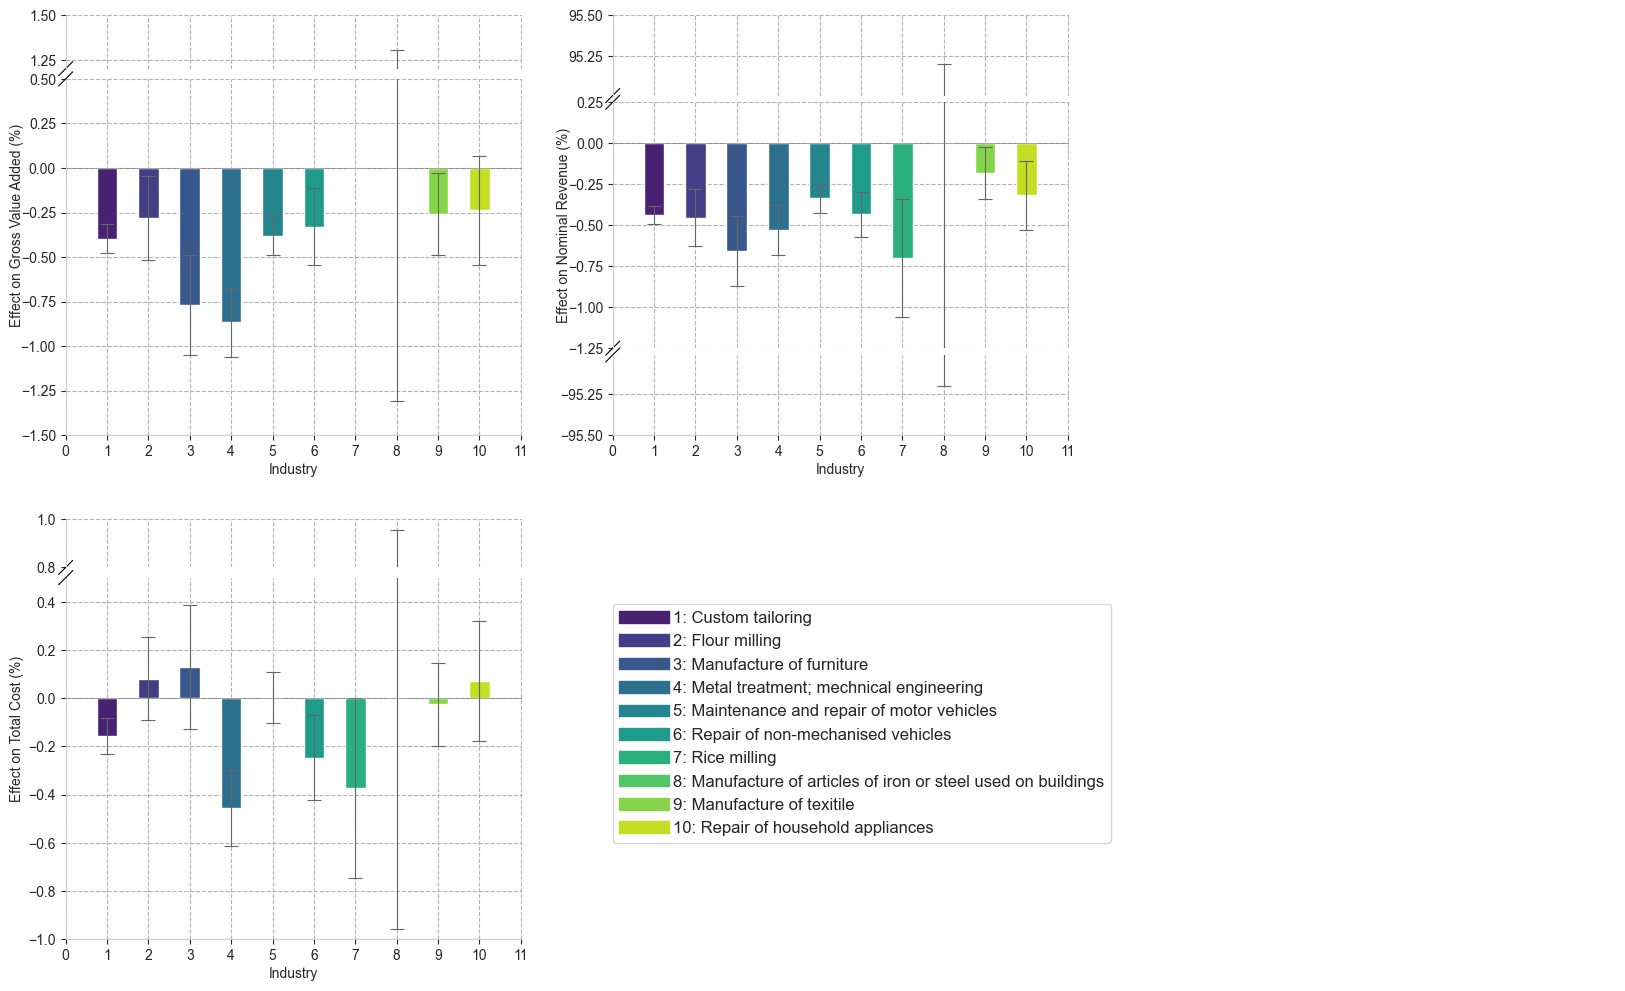

In [537]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import numpy as np

figure_big = plt.figure(figsize=(20, 12))
y_names = ['Effect on Gross Value Added (%)',
           'Effect on Nominal Revenue (%)',
           'Effect on Total Cost (%)',
           'Effect on Labor Cost (%)']
# all except for urban
# plot_index = [0,1,3,4]
# urban
plot_index = [0,1,3]
# plot_index = [0,1,2,3] 
#micro
legends = ["1: Custom tailoring",\
           "2: Flour milling",\
            "3: Manufacture of furniture",\
            "4: Metal treatment; mechnical engineering",\
            "5: Maintenance and repair of motor vehicles",\
            "6: Repair of non-mechanised vehicles",\
            "7: Rice milling",\
            "8: Manufacture of articles of iron or steel used on buildings",\
            "9: Manufacture of texitile",\
            "10: Repair of household appliances"]
# #small
# legends = ["1: Rice milling",\
#           "2: Metal treatment; mechnical engineering",\
#            "3: Manufacture of texitile",\
#            "4: Manufacture of refractory constructional goods",\
#            "5: Manufacture of bricks",\
#            "6: Finishing of cotton textiles",\
#            "7: Other materials for construction",\
#            "8: Cutting, shaping and finishing of stone",\
#            "9: Preparation and spinning of cotton fiber",\
#            "10: Manufacture of plastic products"]

#all
# ylimit_list = [((-2.3, -1.8), (-1.4, 2.5), (5.5, 6)),\
#                ((-1.4, 1.4), (2.1, 2.5)),\
#                ((-2, 0.7), (1.7, 2.5)),\
#                ((-3.5, -2.7), (-1.4, 1.5))]

# micro 
# ylimit_list = [((-1.5,-1.2),(-1.01,0.8),(1.01,1.5)),\
#                ((-1, 0.5), (0.8, 1)),\
#                ((-1.2, 0.5), (1, 1.2)),\
#                ((-1.25, -1),(-0.76, 1.25))]

# small 
# ylimit_list = [((-36,-35.01),(-4,8),(16,18),(34.01,36)),\
#                ((-30, -29), (-5, 10.1),(16, 19),(29, 30)),\
#                ((-60, -56), (-10, -6), (-3, 2),(4, 8), (56, 60)),\
#                ((-20, -16),(-10, -7),(-2.5, 5),(17,20))]

# rural
# ylimit_list = [((-4,-3.6),(-1.5,2.5),(3.5,4)),\
#                ((-2.5,-2.2),(-0.9,0.9),(2.2,2.5)),\
#                ((-4,-3.25),(-1.5,1),(3.25,4)),\
#                ((-5,-4.25),(-1.5,1.5),(4.25,5))]

# urban
ylimit_list = [((-1.5,0.5),(1.2, 1.5)),\
               ((-95.5,-95.01),(-1.25,0.25),(95.01,95.5)),\
               ((-1,0.5),(0.8,1))]

#micro rural
# ylimit_list = [((-8, -7), (-2, 2.5), (5, 6)),\
#                ((-4.5, -4),(-1.4, 1), (3.5, 4)),\
#                ((-8, -7), (-2.5, 1.5), (6.5, 7.01)),\
#                ((-29.5, -28.5), (-1.5, 2),(6.5, 8), (42.5, 44))]

#micro urban
# ylimit_list = [((-2.1, -1.8), (-1.2, 0.8), (1.2, 2.5)),\
#                ((-1, 1.2), (2.3, 2.75)),\
#                ((-1.25, 0.7), (1.7, 2)),\
#                ((-3, -2.5),(-1.5, 1))]




subplot = GridSpec(2,3)
# urban
for i, sheet in enumerate(sheets[4:n_sheets-1]):
# all except for urban
# for i, sheet in enumerate(sheets[4:n_sheets]):
    print(i, sheet)
    sns.set_style("whitegrid", {'grid.linestyle': '--','grid.color': [0.7,0.7,0.7], 'grid.lineWidth': 0.2})
    bax = brokenaxes(ylims=ylimit_list[i], subplot_spec=subplot[plot_index[i]], hspace=.05, d=0.005)
    color_palette = sns.color_palette("viridis",df_summary.shape[0])
    bax.bar(df_summary['category'], df_summary[f'effect_{sheet}'], width = 0.5, color=color_palette) # label='something',
    bax.errorbar(df_summary['category'], df_summary[f'effect_{sheet}'], yerr=df_summary[f"error_{sheet}"], fmt="none", c= [0.4,0.4,0.4], capsize=5, capthick=0.8, elinewidth=0.8)
    bax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    bax.set_xlim(0, 11.02)
    bax.set_xticks(np.arange(0, 12, 1))
    plt.ylabel(y_names[i],labelpad=30)
    plt.xlabel('Industry',labelpad=20)

patches = [matplotlib.patches.Patch(color=color_palette[i], label=t) for i,t in enumerate(legends)]

ax_d = figure_big.add_subplot(subplot[5])

# Create the first legend
# all except for urban
# legend1 = plt.legend(handles=patches[:5], labels=legends[:5],
#                      handlelength=3, handletextpad=0.2, fontsize=12,
#                      loc=(-2.3,-0.5), shadow=False, facecolor='white')
# ax = plt.gca().add_artist(legend1)

# Create the second legend
# micro/all/rural loc
# plt.legend(handles=patches[5:], labels=legends[5:],
#            handlelength=3, handletextpad=0.2, fontsize=12,
#            loc=(-1.4,-0.5), shadow=False, facecolor='white')
# urban loc
plt.legend(handles=patches, labels=legends,
           handlelength=3, handletextpad=0.2, fontsize=12,
           loc=(-1.2,0.23), shadow=False, facecolor='white')
# small loc
# plt.legend(handles=patches[5:], labels=legends[5:],
#            handlelength=3, handletextpad=0.2, fontsize=12,
#            loc=(-1.2,-0.5), shadow=False, facecolor='white')

ax_d.axis('off')

plt.show()

In [286]:
############################# the rest is useless #############################

0 rural_gva
1 rural_nr
2 rural_tc
3 rural_lc


c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will

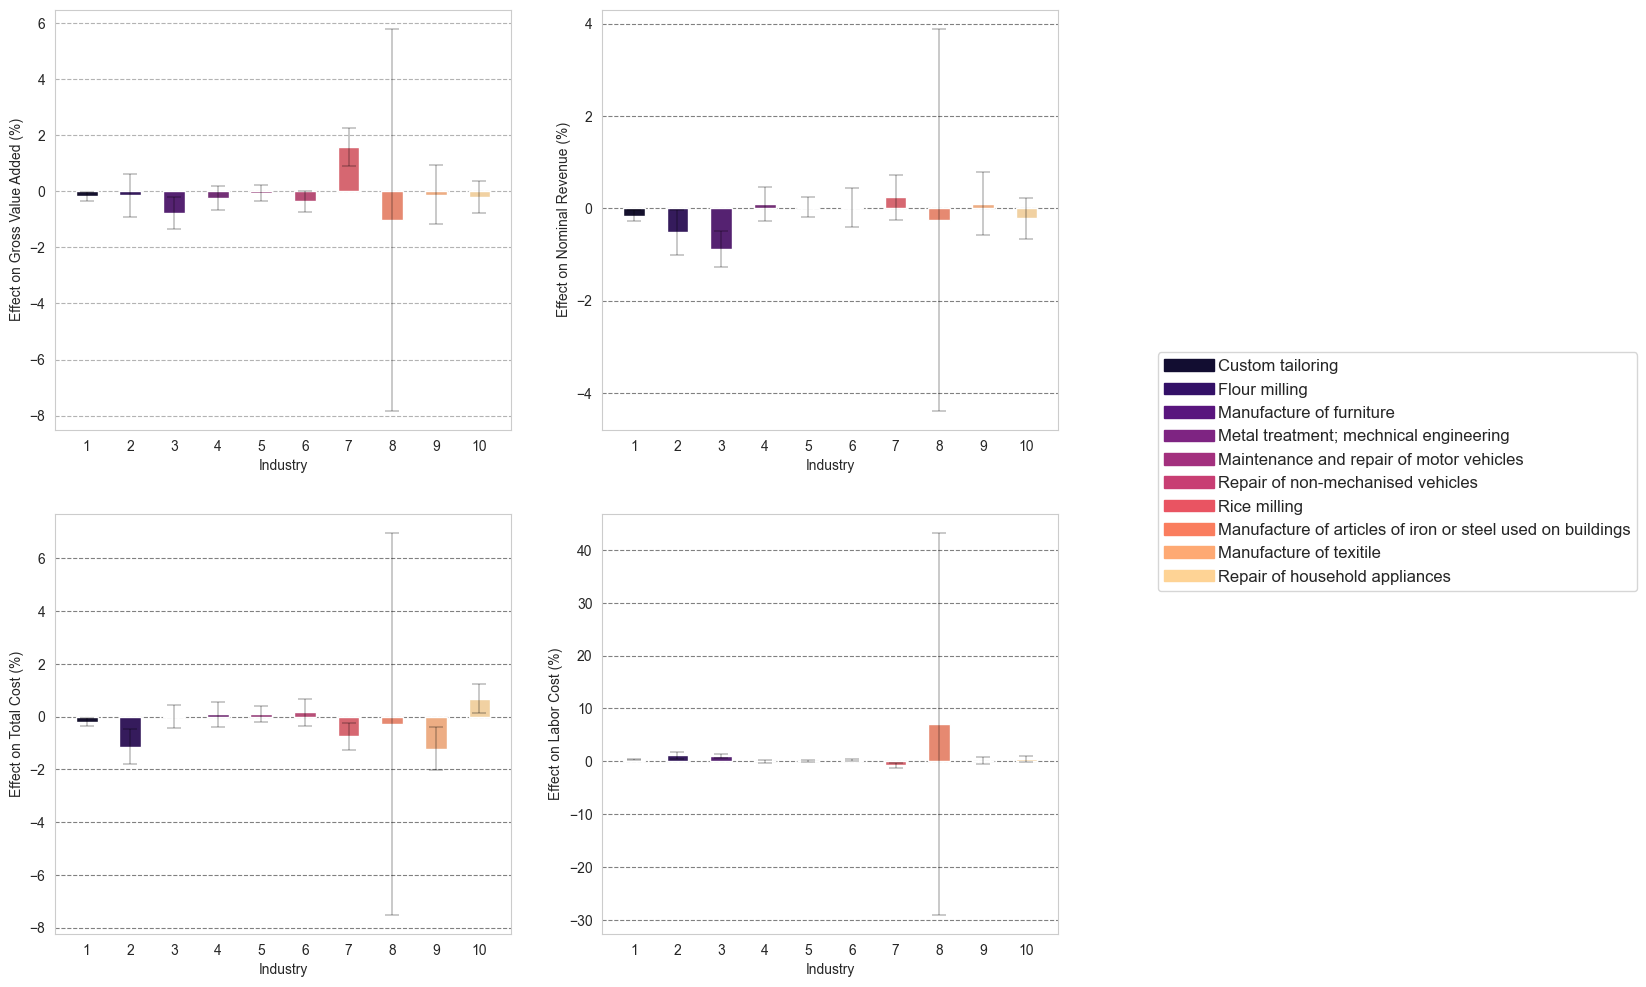

In [287]:
plt.figure(figsize=(20, 12))
y_names = ['Effect on Gross Value Added (%)',
           'Effect on Nominal Revenue (%)',
           'Effect on Total Cost (%)',
           'Effect on Labor Cost (%)']
plot_index = [1,2,4,5]
#micro
legends = ["Custom tailoring",\
           "Flour milling",\
            "Manufacture of furniture",\
            "Metal treatment; mechnical engineering",\
            "Maintenance and repair of motor vehicles",\
            "Repair of non-mechanised vehicles",\
            "Rice milling",\
            "Manufacture of articles of iron or steel used on buildings",\
            "Manufacture of texitile",\
            "Repair of household appliances"]
#small
#legends = ["Rice milling",\
#           "Metal treatment; mechnical engineering",\
#            "Manufacture of texitile",\
#            "Manufacture of refractory constructional goods",\
#            "Manufacture of bricks",\
#            "Finishing of cotton textiles",\
#            "Other materials for construction",\
#            "Cutting, shaping and finishing of stone",\
#            "Preparation and spinning of cotton fiber",\
#            "Manufacture of plastic products"]

for i, sheet in enumerate(sheets[0:n_sheets]):
    print(i, sheet)
    plt.subplot(2, 3, plot_index[i])
    sns.set_style("whitegrid", {'grid.linestyle': '--','grid.color': 'gray', 'grid.lineWidth': 0.2})
    sns.set_palette(palette=sns.color_palette("magma",df_summary.shape[0]))
    ax=sns.barplot(data = df_summary, x='category', y=f'effect_{sheet}', width = 0.5)
    x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    plt.errorbar(x=x_coords, y=y_coords, yerr=df_summary[f"error_{sheet}"], fmt="none", c= "black", capsize=5, capthick=0.3, elinewidth=0.3)
    # plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
    plt.ylabel(y_names[i])
    plt.xlabel('Industry')

patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in ax.get_xticklabels())]
# ax.legend(patches, legends, title="Categories")

ax_d = plt.subplot(1, 3, 3)
ax_d.legend(handles=patches, labels=legends,
           handlelength=3, handletextpad=0.2, fontsize=12,
           loc='center left', shadow=False, facecolor='white')
ax_d.axis('off')


plt.show()


Text(0, 0.5, 'value')

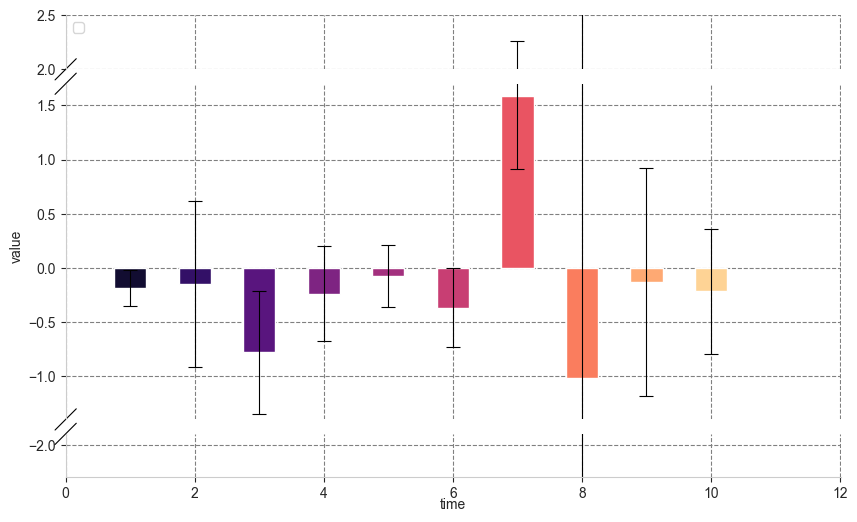

In [288]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np

sheet = sheets[0]
fig = plt.figure(figsize=(10, 6))
bax = brokenaxes(ylims=((-2.3, -1.9), (-1.4, 1.7), (2.0, 2.5)), hspace=.1)
color_palette = sns.color_palette("magma",df_summary.shape[0])
bax.bar(df_summary['category'], df_summary[f'effect_{sheet}'], width = 0.5, color=color_palette) # label='something',
bax.errorbar(df_summary['category'], df_summary[f'effect_{sheet}'], yerr=df_summary[f"error_{sheet}"], fmt="none", c= "black", capsize=5, capthick=0.8, elinewidth=0.8)
bax.legend(loc='upper left')
bax.set_xlim(0, 12.01)
bax.set_xlabel('time')
bax.set_ylabel('value')

Text(0, 0.5, 'value')

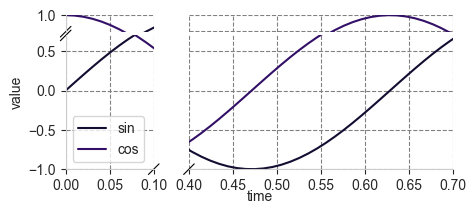

In [289]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import numpy as np

fig = plt.figure(figsize=(5, 2))
bax = brokenaxes(xlims=((0, .1), (.4, .7)), ylims=((-1, .7), (.79, 1)), hspace=.05)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(10 * x), label='sin')
bax.plot(x, np.cos(10 * x), label='cos')
bax.legend(loc=3)
bax.set_xlabel('time')
bax.set_ylabel('value')

0 rural_gva
1 rural_nr
2 rural_tc
3 rural_lc


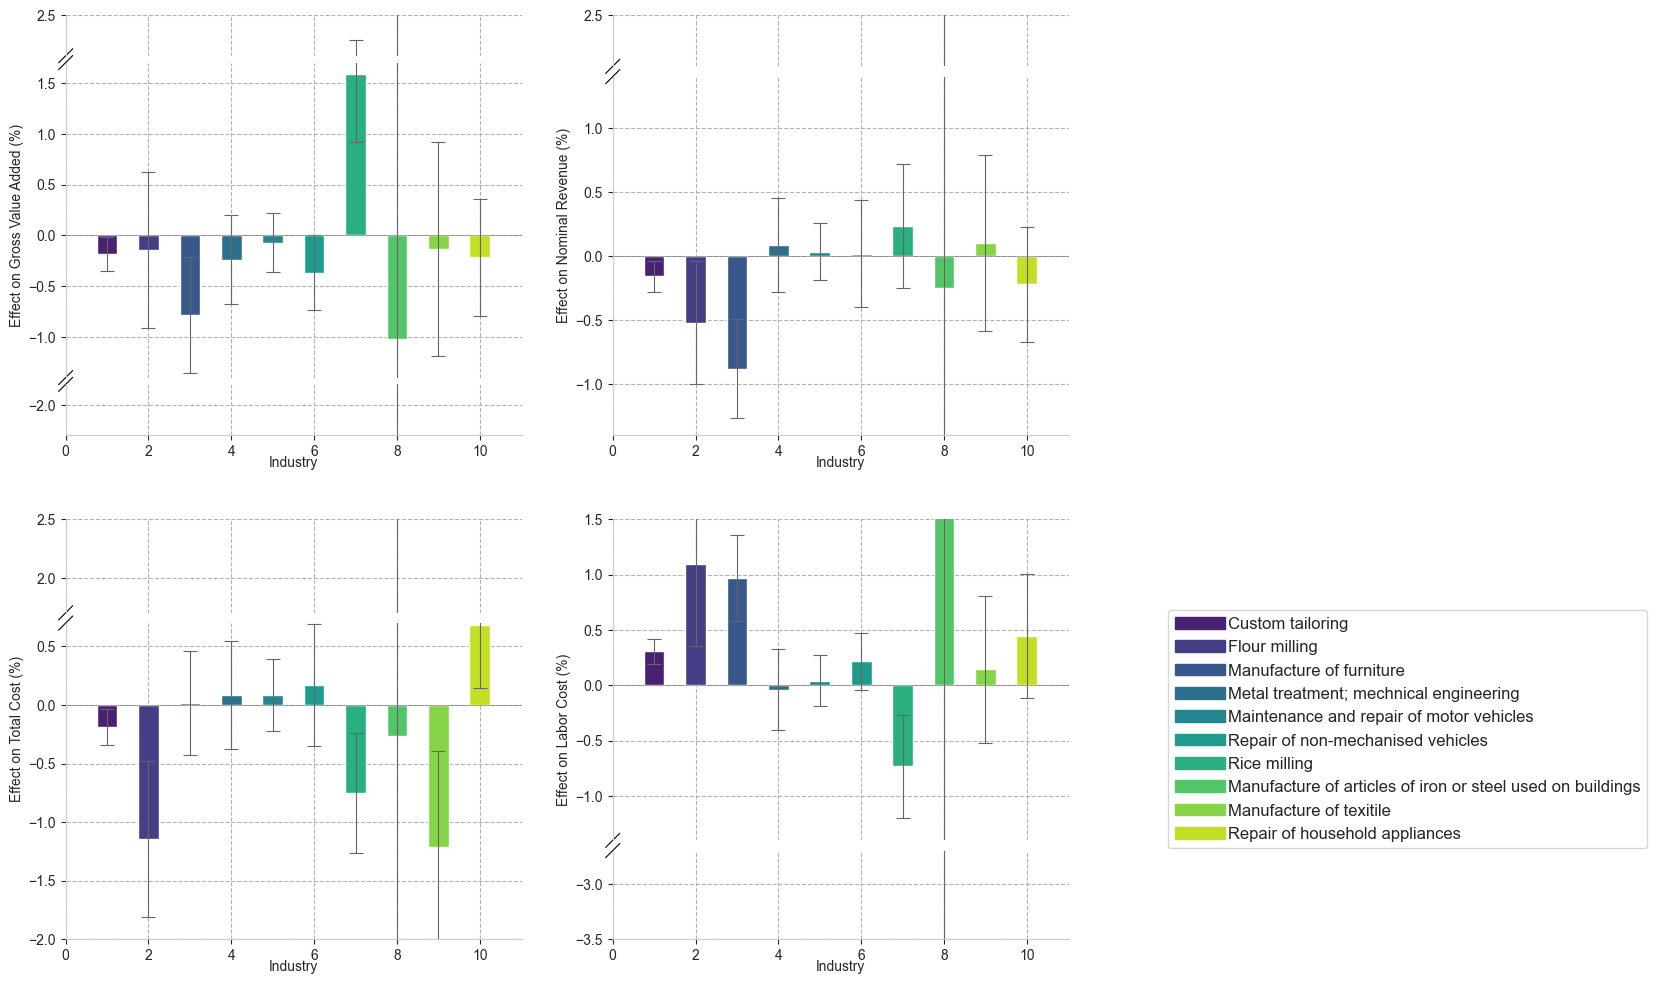

In [290]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import numpy as np

figure_big = plt.figure(figsize=(20, 12))
y_names = ['Effect on Gross Value Added (%)',
           'Effect on Nominal Revenue (%)',
           'Effect on Total Cost (%)',
           'Effect on Labor Cost (%)']
plot_index = [0,1,3,4]
#micro
legends = ["Custom tailoring",\
           "Flour milling",\
            "Manufacture of furniture",\
            "Metal treatment; mechnical engineering",\
            "Maintenance and repair of motor vehicles",\
            "Repair of non-mechanised vehicles",\
            "Rice milling",\
            "Manufacture of articles of iron or steel used on buildings",\
            "Manufacture of texitile",\
            "Repair of household appliances"]
#small
#legends = ["Rice milling",\
#           "Metal treatment; mechnical engineering",\
#            "Manufacture of texitile",\
#            "Manufacture of refractory constructional goods",\
#            "Manufacture of bricks",\
#            "Finishing of cotton textiles",\
#            "Other materials for construction",\
#            "Cutting, shaping and finishing of stone",\
#            "Preparation and spinning of cotton fiber",\
#            "Manufacture of plastic products"]

ylimit_list = [((-2.3, -1.8), (-1.4, 1.7), (2.1, 2.5)),\
               ((-1.4, 1.4), (2.1, 2.5)),\
               ((-2, 0.7), (1.7, 2.5)),\
               ((-3.5, -2.7), (-1.4, 1.5))]

subplot = GridSpec(2,3)
for i, sheet in enumerate(sheets[0:n_sheets]):
    print(i, sheet)
    sns.set_style("whitegrid", {'grid.linestyle': '--','grid.color': [0.7,0.7,0.7], 'grid.lineWidth': 0.2})
    bax = brokenaxes(ylims=ylimit_list[i], subplot_spec=subplot[plot_index[i]], hspace=.05, d=0.005)
    color_palette = sns.color_palette("viridis",df_summary.shape[0])
    bax.bar(df_summary['category'], df_summary[f'effect_{sheet}'], width = 0.5, color=color_palette) # label='something',
    bax.errorbar(df_summary['category'], df_summary[f'effect_{sheet}'], yerr=df_summary[f"error_{sheet}"], fmt="none", c= [0.4,0.4,0.4], capsize=5, capthick=0.8, elinewidth=0.8)
    bax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    bax.set_xlim(0, 11.01)
    bax.set_ylabel(y_names[i])
    bax.set_xlabel('Industry')

patches = [matplotlib.patches.Patch(color=color_palette[i], label=t) for i,t in enumerate(legends)]

ax_d = figure_big.add_subplot(subplot[5])
ax_d.legend(handles=patches, labels=legends,
           handlelength=3, handletextpad=0.2, fontsize=12,
           loc='center left', shadow=False, facecolor='white')
ax_d.axis('off')


plt.show()


0 rural_gva


c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


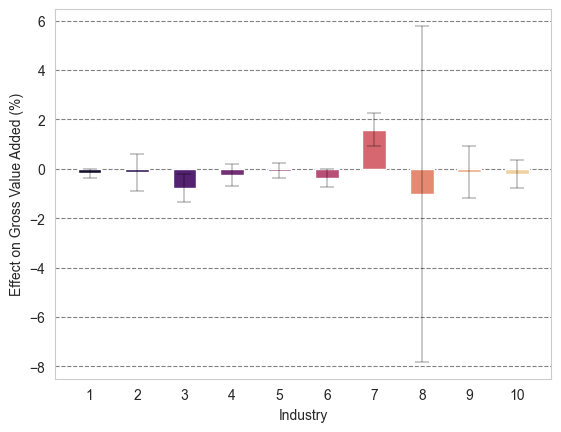

In [291]:
y_names = ['Effect on Gross Value Added (%)',
           'Effect on Nominal Revenue (%)',
           'Effect on Total Cost (%)',
           'Effect on Labor Cost (%)']
plot_index = [1,2,4,5]
#micro
legends = ["Custom tailoring",\
        "Flour milling",\
            "Manufacture of furniture",\
            "Metal treatment; mechnical engineering",\
            "Maintenance and repair of motor vehicles",\
            "Repair of non-mechanised vehicles",\
            "Rice milling",\
            "Manufacture of articles of iron or steel used on buildings",\
            "Manufacture of texitile",\
            "Repair of household appliances"]
#small
#legends = ["Rice milling",\
#           "Metal treatment; mechnical engineering",\
#            "Manufacture of texitile",\
#            "Manufacture of refractory constructional goods",\
#            "Manufacture of bricks",\
#            "Finishing of cotton textiles",\
#            "Other materials for construction",\
#            "Cutting, shaping and finishing of stone",\
#            "Preparation and spinning of cotton fiber",\
#            "Manufacture of plastic products"]

i=0
sheet = sheets[0]
print(i, sheet)
# plt.subplot(2, 3, plot_index[i])
sns.set_style("whitegrid", {'grid.linestyle': '--','grid.color': 'gray', 'grid.lineWidth': 0.2})
sns.set_palette(palette=sns.color_palette("magma",df_summary.shape[0]))
ax=sns.barplot(data = df_summary, x='category', y=f'effect_{sheet}', width = 0.5)
x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=df_summary[f"error_{sheet}"], fmt="none", c= "black", capsize=5, capthick=0.3, elinewidth=0.3)
# plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.ylabel(y_names[i])
plt.xlabel('Industry')

patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in ax.get_xticklabels())]
# ax.legend(patches, legends, title="Categories")

plt.show()


[(array([ 43., 153., 226., 239., 167.,  99.,  41.,  27.,   4.,   1.]),
  array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
  <BarContainer object of 10 artists>),
 (array([ 43., 153., 226., 239., 167.,  99.,  41.,  27.,   4.,   1.]),
  array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
  <BarContainer object of 10 artists>)]

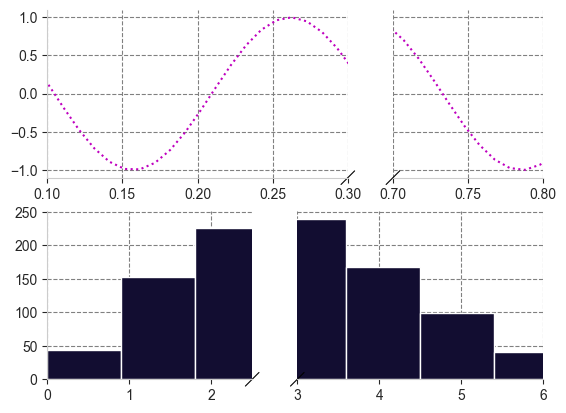

In [292]:
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import numpy as np

sps1, sps2 = GridSpec(2,1)

bax = brokenaxes(xlims=((.1, .3), (.7, .8)), subplot_spec=sps1)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(x*30), ls=':', color='m')

x = np.random.poisson(3, 1000)
bax = brokenaxes(xlims=((0, 2.5), (3, 6)), subplot_spec=sps2)
bax.hist(x, histtype='bar')